In [15]:
# 그림을 저장할 폴드
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"


def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

# 6.1 결정트리 학습과 시각화

In [16]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [17]:
image_path("iris_tree.dot")

'.\\images\\decision_trees\\iris_tree.dot'

In [18]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=image_path("iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

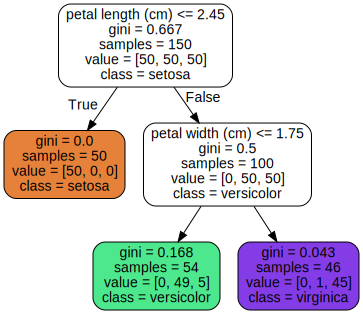

In [19]:
import graphviz
with open("images/decision_trees/iris_tree.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = "png"
dot.render(filename="iris_tree", directory="images/decision_trees", cleanup=True)
dot

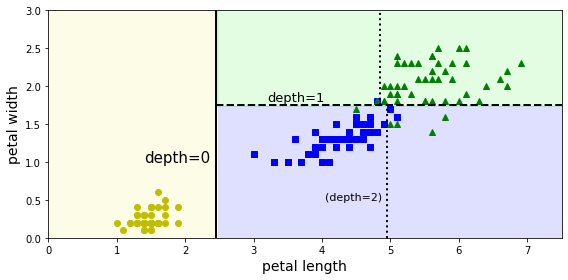

In [20]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
def plot_decision_boundary(clf, X,y ,axes=[0,7.5,0,3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3],100)
    x1,x2 = np.meshgrid(x1s,x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap=ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
    plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1,x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:,0][y==0], X[:,1][y==0], "yo", label="iris-Setosa")
        plt.plot(X[:,0][y==1], X[:,1][y==1], "bs", label="iris-Versicolor")
        plt.plot(X[:,0][y==2], X[:,1][y==2], "g^", label="iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("petal length", fontsize=14)
        plt.ylabel("petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf,X,y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "depth=0", fontsize=15)
plt.text(3.2, 1.80, "depth=1", fontsize=13)
plt.text(4.05, 0.5, "(depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

In [21]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [22]:
tree_clf.predict([[5, 1.5]])

array([1])